In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(
                               rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.8, 1.25],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',
                               data_format='channels_last',
                               brightness_range=[0.5, 1.5]) #included in our dependencies

test_datagen = ImageDataGenerator(
                               rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.8, 1.25],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',
                               data_format='channels_last',
                               brightness_range=[0.5, 1.5]) #included in our dependencies

In [4]:
image_size = (128,128)
batch_size = 10

training_data_dir = r'C:\DeepLearning\Images\Train'
validation_data_dir = r'C:\DeepLearning\Images\Validation'

train_generator=train_datagen.flow_from_directory(training_data_dir,
                                                 target_size=image_size,
                                                 color_mode='rgb',
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_generator = test_datagen.flow_from_directory(
                                        validation_data_dir,
                                         target_size=image_size,
                                         color_mode='rgb',
                                        class_mode = "categorical")

Found 1607 images belonging to 20 classes.
Found 557 images belonging to 20 classes.


In [5]:
x_batch, y_batch = next(train_generator)

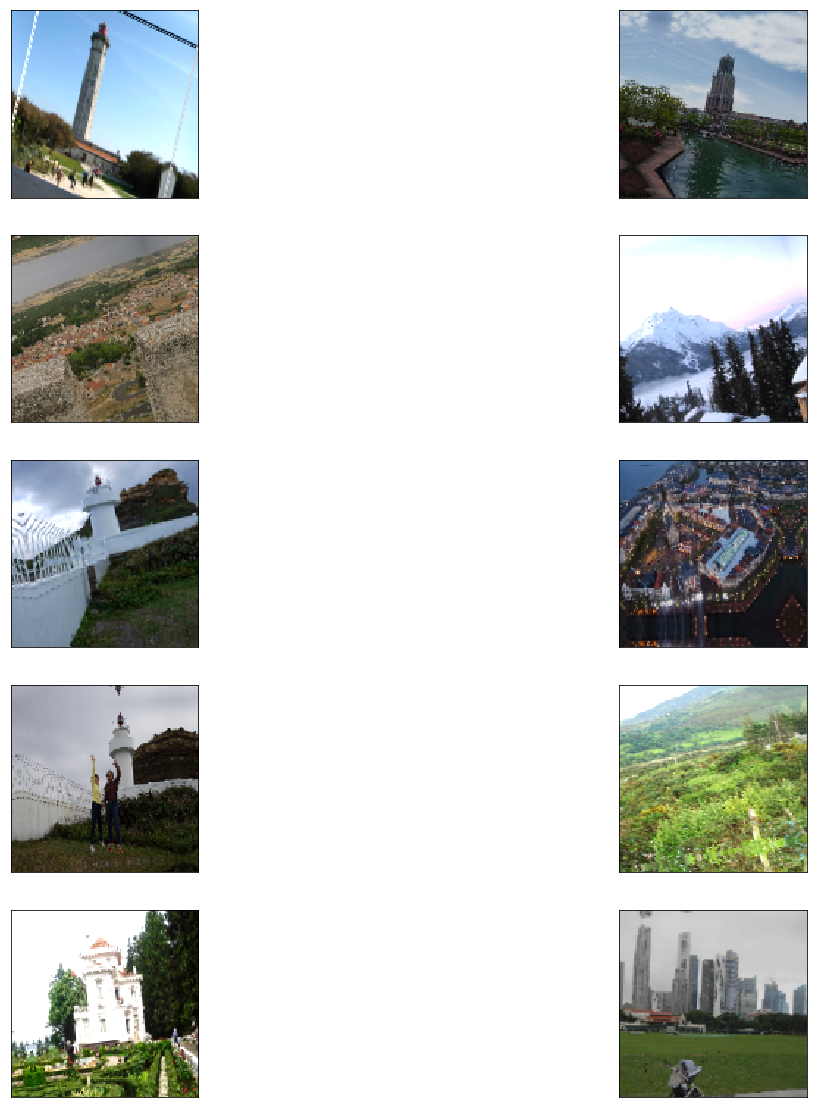

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = x_batch[i]
    image= image.astype(int)
    plt.imshow(image)

In [7]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback
from tensorflow.keras.utils import plot_model

In [8]:
base_model = applications.ResNet50(weights = "imagenet", include_top=False, input_shape = (image_size[0], image_size[1], 3))

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 207s 2us/step


In [9]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [10]:
for layer in base_model.layers[:]:
    print(layer.name)

input_1
conv1_pad
conv1
bn_conv1
activation
pool1_pad
max_pooling2d
res2a_branch2a
bn2a_branch2a
activation_1
res2a_branch2b
bn2a_branch2b
activation_2
res2a_branch2c
res2a_branch1
bn2a_branch2c
bn2a_branch1
add
activation_3
res2b_branch2a
bn2b_branch2a
activation_4
res2b_branch2b
bn2b_branch2b
activation_5
res2b_branch2c
bn2b_branch2c
add_1
activation_6
res2c_branch2a
bn2c_branch2a
activation_7
res2c_branch2b
bn2c_branch2b
activation_8
res2c_branch2c
bn2c_branch2c
add_2
activation_9
res3a_branch2a
bn3a_branch2a
activation_10
res3a_branch2b
bn3a_branch2b
activation_11
res3a_branch2c
res3a_branch1
bn3a_branch2c
bn3a_branch1
add_3
activation_12
res3b_branch2a
bn3b_branch2a
activation_13
res3b_branch2b
bn3b_branch2b
activation_14
res3b_branch2c
bn3b_branch2c
add_4
activation_15
res3c_branch2a
bn3c_branch2a
activation_16
res3c_branch2b
bn3c_branch2b
activation_17
res3c_branch2c
bn3c_branch2c
add_5
activation_18
res3d_branch2a
bn3d_branch2a
activation_19
res3d_branch2b
bn3d_branch2b
activat

In [11]:
for layer in base_model.layers[:]:
    layer.trainable = False

In [12]:
classCount = 20

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(4096,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(4096,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(2048,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
preds=Dense(classCount,activation='softmax')(x) #final layer with softmax activation

model_final=Model(inputs=base_model.input,outputs=preds)

In [13]:
model_final.summary()

plot_model(model_final, to_file='C:\DeepLearning\\model2_plot.png', show_shapes=True, show_layer_names=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [27]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.001, momentum=0.9), metrics=["accuracy"])

In [28]:
step_size_train=train_generator.n//train_generator.batch_size
print(step_size_train)

160


In [29]:
class LossAccHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracy = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracy.append(logs.get('acc'))
        
history = LossAccHistory()

In [30]:
model_final.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data = validation_generator,
                   epochs=6
                   ,callbacks = [history])

Epoch 1/6
160/160 [==============================] - 160s 1s/step - loss: 1.7710 - acc: 0.5362 - val_loss: 1.6481 - val_acc: 0.5260
Epoch 2/6
160/160 [==============================] - 158s 986ms/step - loss: 0.9490 - acc: 0.7329 - val_loss: 2.0292 - val_acc: 0.4722
Epoch 3/6
160/160 [==============================] - 157s 982ms/step - loss: 0.7181 - acc: 0.7897 - val_loss: 2.1007 - val_acc: 0.5117
Epoch 4/6
160/160 [==============================] - 157s 983ms/step - loss: 0.5774 - acc: 0.8335 - val_loss: 1.5426 - val_acc: 0.6212
Epoch 5/6
160/160 [==============================] - 158s 990ms/step - loss: 0.5292 - acc: 0.8347 - val_loss: 2.2132 - val_acc: 0.5009
Epoch 6/6
160/160 [==============================] - 158s 985ms/step - loss: 0.4450 - acc: 0.8682 - val_loss: 1.4594 - val_acc: 0.6571


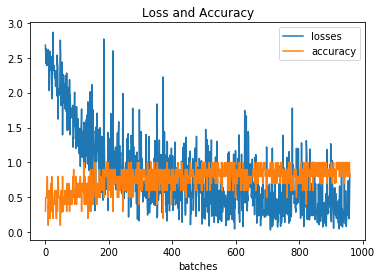

In [31]:
import matplotlib.pyplot as plt
x = range(0, len(history.losses))
plt.plot(x, history.losses)
plt.plot(x, history.accuracy)
plt.xlabel('batches')
plt.title('Loss and Accuracy')
plt.legend(['losses', 'accuracy'])

In [32]:
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=2, verbose=1, mode='auto')

In [33]:
import time

networkfileName = "D:\GitDeepLearning\ML2\\resnet50_{}.h5".format(int(time.time()))
checkpoint = ModelCheckpoint(networkfileName, monitor='val_acc', verbose=1,
                             save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [34]:
history = LossAccHistory()
model_final.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data = validation_generator,
                   epochs=3
                   ,callbacks = [history, checkpoint, early])

Epoch 1/3
159/160 [============================>.] - ETA: 0s - loss: 0.4501 - acc: 0.8633
Epoch 00001: val_acc improved from -inf to 0.41652, saving model to D:\GitDeepLearning\ML2\resnet50_1547199544.h5
160/160 [==============================] - 165s 1s/step - loss: 0.4493 - acc: 0.8635 - val_loss: 3.1348 - val_acc: 0.4165
Epoch 2/3
159/160 [============================>.] - ETA: 0s - loss: 0.3519 - acc: 0.8868
Epoch 00002: val_acc improved from 0.41652 to 0.48654, saving model to D:\GitDeepLearning\ML2\resnet50_1547199544.h5
160/160 [==============================] - 161s 1s/step - loss: 0.3506 - acc: 0.8875 - val_loss: 2.6126 - val_acc: 0.4865
Epoch 3/3
159/160 [============================>.] - ETA: 0s - loss: 0.3330 - acc: 0.8956
Epoch 00003: val_acc did not improve from 0.48654
160/160 [==============================] - 158s 987ms/step - loss: 0.3348 - acc: 0.8944 - val_loss: 2.8301 - val_acc: 0.4758


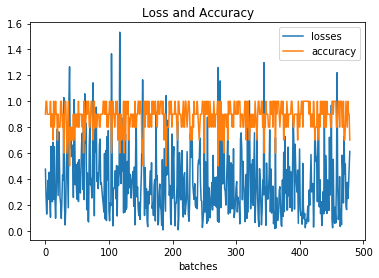

In [35]:
import matplotlib.pyplot as plt
x = range(0, len(history.losses))
plt.plot(x, history.losses)
plt.plot(x, history.accuracy)
plt.xlabel('batches')
plt.title('Loss and Accuracy')
plt.legend(['losses', 'accuracy'])

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# The directory of KNN train data
data_dir = r'C:\DeepLearning\RealImages\Train'

# The neural network model into base_model
base_model = load_model('C:\DeepLearning\TrainingData\ML2\\resnet50_1547199544.h5')

# Cut the customized layers from the read resnet algorithm
x=base_model.get_layer('activation_48').output

# Eport network to one dimension
vector=Flatten()(x)

# Make the model with the whole network as input and the vector as output
model = Model(inputs=base_model.input, outputs=vector)

datagen = ImageDataGenerator()     # Creating the Data generator

# Generator from the images
generator = datagen.flow_from_directory(
        data_dir,
        target_size=(128, 128),
        batch_size=1,
        class_mode='categorical',  # only data, no labels
        shuffle=False)  # keep data in same order as label

Found 10057 images belonging to 100 classes.


In [3]:
import numpy as np

imgsList = []
proccImgs = []
labels = []

# For each image in the generator
for i in range(generator.n):
    (img, lbl) = generator.next();
    
    # Adding the image to the list of images
    imgsList.append(img)
    
    # Adding the proccessed images to the list of processed imaged
    proccImgs.append(np.reshape(model.predict_on_batch(img), -1))
    
    # Adding the image labels to list of labels
    labels.append(np.argmax(lbl))
    
print(labels)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\PIL\Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [5]:
print(imgsList)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)

# Fit with KNN algorithm with the proccessed images and labels
neigh.fit(proccImgs, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [32]:
test_datagen = ImageDataGenerator()     # Creating the Data generator
validation_data_dir = r'C:\DeepLearning\RealImages\Validation'

validation_generator = test_datagen.flow_from_directory(
                                        validation_data_dir,
                                        target_size=(128, 128),
                                        batch_size=1,
                                        color_mode='rgb',
                                        class_mode = "categorical",
                                        shuffle=True)
x_img, y_label = next(validation_generator);
features = model.predict(x_img)

Found 2803 images belonging to 100 classes.


In [33]:
print(x_img)

[[[[181. 197. 223.]
   [181. 198. 224.]
   [182. 198. 224.]
   ...
   [216. 234. 255.]
   [218. 236. 255.]
   [218. 236. 255.]]

  [[179. 199. 224.]
   [182. 198. 224.]
   [185. 199. 225.]
   ...
   [216. 234. 254.]
   [219. 236. 255.]
   [218. 236. 255.]]

  [[182. 198. 224.]
   [182. 199. 225.]
   [180. 200. 224.]
   ...
   [214. 232. 252.]
   [217. 235. 255.]
   [218. 235. 255.]]

  ...

  [[180. 168. 116.]
   [190. 183. 115.]
   [185. 177. 115.]
   ...
   [220. 219. 214.]
   [191. 183. 204.]
   [207. 208. 210.]]

  [[149. 138.  93.]
   [188. 178. 127.]
   [170. 160. 109.]
   ...
   [191. 178. 198.]
   [148. 146. 151.]
   [156. 143. 169.]]

  [[136. 128.  89.]
   [127. 126.  70.]
   [124. 122.  73.]
   ...
   [217. 217. 165.]
   [187. 187. 153.]
   [146. 147. 141.]]]]


In [34]:
x_img.size

49152

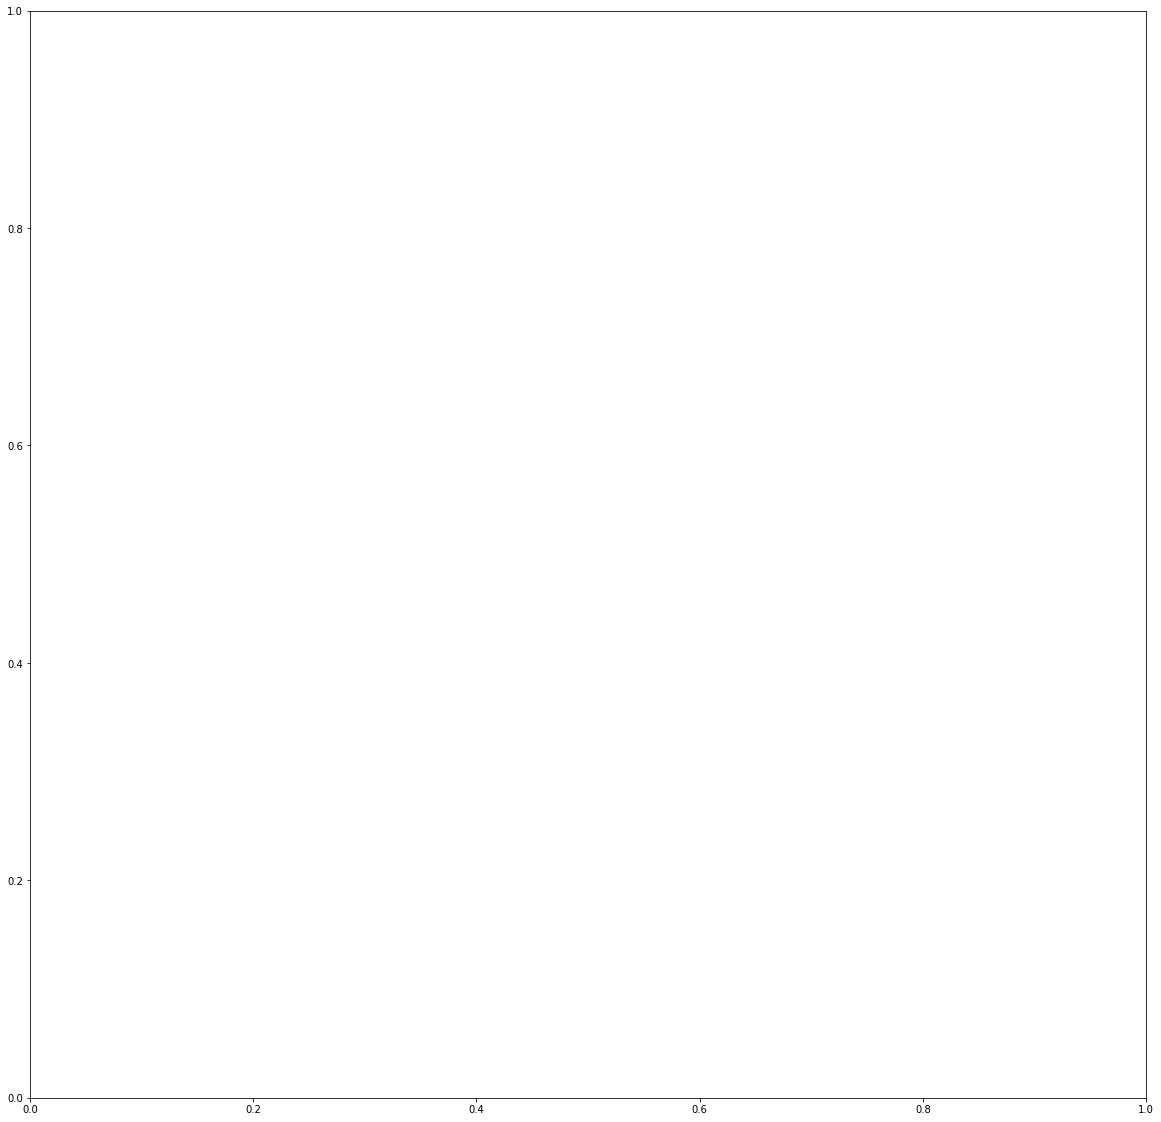

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
plt.subplot(1,1,1)
image = x_img

In [36]:
image= image.astype(int)
image = np.reshape(image, (128, 128, 3))

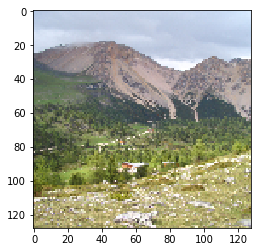

In [37]:
plt.imshow(image)

In [38]:
labels = neigh.kneighbors(features, return_distance=False) 

print(labels[0])

[ 2786  2807 10038  3254  2780  3724  6500  3310  2792  3257]


[ 2786  2807 10038  3254  2780  3724  6500  3310  2792  3257]
[ 2786  2807 10038  3254  2780  3724  6500  3310  2792  3257]
[ 2786  2807 10038  3254  2780  3724  6500  3310  2792  3257]
[ 2786  2807 10038  3254  2780  3724  6500  3310  2792  3257]
[ 2786  2807 10038  3254  2780  3724  6500  3310  2792  3257]
[ 2786  2807 10038  3254  2780  3724  6500  3310  2792  3257]
[ 2786  2807 10038  3254  2780  3724  6500  3310  2792  3257]
[ 2786  2807 10038  3254  2780  3724  6500  3310  2792  3257]
[ 2786  2807 10038  3254  2780  3724  6500  3310  2792  3257]
[ 2786  2807 10038  3254  2780  3724  6500  3310  2792  3257]


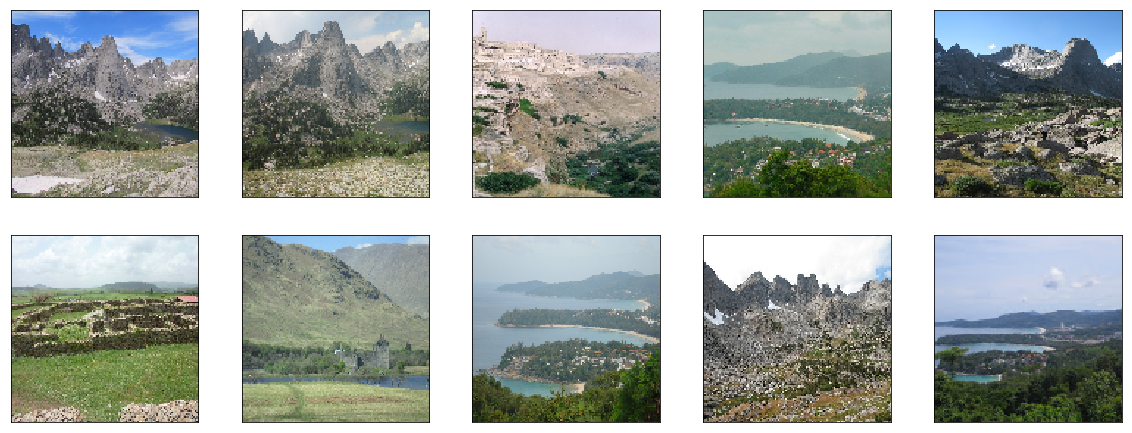

In [39]:
plt.figure(figsize=(20, 20))
for j in range(10):
    plt.subplot(5,5,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = imgsList[labels[0][j]]
    image= image.astype(int)
    image = np.reshape(image, (128, 128, 3))
    plt.imshow(image)
    print(labels[0])